# Step 0: Import Packages
import gensim
from gensim.models import Word2Vec

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
import numpy as np
%matplotlib inline
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
warnings.filterwarnings(action = 'ignore')
import gensim
from gensim.models import Word2Vec
import re
import bs4 as bs
import urllib.request
import nltk

In [ ]:

nltk.download('punkt')
nltk.download('stopwords')

# Step 1(a) : Download or collect data. or Prepare Corpus

In [3]:
scrapped_data=urllib.request.urlopen("https://en.wikipedia.org/wiki/Machine_learning")
article=scrapped_data.read()
paresed_article=bs.BeautifulSoup(article,'lxml')
paragraphs=paresed_article.find_all('p')
article_text=""
for p in paragraphs:
  article_text+=p.text
sentences=article_text

In [7]:
print(article_text)

Machine learning (ML) is a field of inquiry devoted to understanding and building methods that 'learn', that is, methods that leverage data to improve performance on some set of tasks.[1] It is seen as a part of artificial intelligence. Machine learning algorithms build a model based on sample data, known as training data, in order to make predictions or decisions without being explicitly programmed to do so.[2] Machine learning algorithms are used in a wide variety of applications, such as in medicine, email filtering, speech recognition, agriculture, and computer vision, where it is difficult or unfeasible to develop conventional algorithms to perform the needed tasks.[3][4] 
A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers, but not all machine learning is statistical learning. The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mi

**Instead of lengthy text on wiki, we can try for a small text as well**

In [5]:
sentences="""Alice 23 opened the door and found that it led into a small 90
passage, not much larger than a rat-hole:  she knelt down and
looked along the passage into the loveliest garden you ever saw.
How she longed to get out of that dark hall, and wander about
among those beds of bright flowers and those cool fountains, but
she could not even get her head through the doorway; `and even if
my head would go through,' (thought) $poor Alice, `it would be of
very little use without my shoulders.  Oh, how I wish
I could shut up like a telescope!  I think I could, if I only
know how to begin.'  For, you see, so many out-of-the-way things
had happened lately, that Alice had begun to think that very few
things indeed were really impossible.

  
"""

In [6]:
sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()
print(sentences)

Alice 23 opened the door and found that it led into small 90 passage not much larger than rat hole she knelt down and looked along the passage into the loveliest garden you ever saw How she longed to get out of that dark hall and wander about among those beds of bright flowers and those cool fountains but she could not even get her head through the doorway and even if my head would go through thought poor Alice it would be of very little use without my shoulders Oh how wish could shut up like telescope think could if only know how to begin For you see so many out of the way things had happened lately that Alice had begun to think that very few things indeed were really impossible


# Step 1(b) : Prepare Dataset
1. Remove all special characters and digits
2. Remove all punctuation marks
3. bring all letters to lower case
4. Tokenize the document into sentences and words
5. Remove all stop words.

#Step 2: Generate Training Data

In [8]:
# remove special characters
sentences = re.sub('[^A-Za-z]+', ' ', sentences)

# remove 1 letter words
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()

# lower all characters
sentences = sentences.lower()

all_sent=nltk.sent_tokenize(sentences)
all_words=[nltk.word_tokenize(sent) for sent in all_sent]

from nltk.corpus import stopwords
for i in range(len(all_words)):
  all_words[i]=[w for w in all_words[i] if w not in stopwords.words('english')]
data =all_words
data1=data[0]

# Step 3 : Train the model
Use Gensim word2vec for training the model.

In [12]:
model1 = gensim.models.Word2Vec(data, min_count = 1,size = 52, window = 5)

In [13]:
vocabulary=model1.wv.vocab
print(vocabulary)

{'alice': <gensim.models.keyedvectors.Vocab object at 0x7f521d19b310>, 'opened': <gensim.models.keyedvectors.Vocab object at 0x7f521d19b890>, 'door': <gensim.models.keyedvectors.Vocab object at 0x7f521d8f2d50>, 'found': <gensim.models.keyedvectors.Vocab object at 0x7f521d1f10d0>, 'led': <gensim.models.keyedvectors.Vocab object at 0x7f521d1e9910>, 'small': <gensim.models.keyedvectors.Vocab object at 0x7f521d1e9410>, 'passage': <gensim.models.keyedvectors.Vocab object at 0x7f521d1e9e10>, 'much': <gensim.models.keyedvectors.Vocab object at 0x7f521d1e9d50>, 'larger': <gensim.models.keyedvectors.Vocab object at 0x7f521d1f1250>, 'rat': <gensim.models.keyedvectors.Vocab object at 0x7f521d1e9d90>, 'hole': <gensim.models.keyedvectors.Vocab object at 0x7f521d1e9ad0>, 'knelt': <gensim.models.keyedvectors.Vocab object at 0x7f521d1e9e50>, 'looked': <gensim.models.keyedvectors.Vocab object at 0x7f521d1e9c10>, 'along': <gensim.models.keyedvectors.Vocab object at 0x7f521d1e93d0>, 'loveliest': <gensim.

In [14]:
wrd='door'
#wrd=['subset','machine', 'learning','closely','related']
v1=model1.wv[wrd]
similar_words=model1.wv.most_similar(wrd)
for x in similar_words:
  print(x)

('small', 0.358035147190094)
('bright', 0.2810012996196747)
('way', 0.23993095755577087)
('could', 0.22773373126983643)
('looked', 0.22020190954208374)
('loveliest', 0.21954351663589478)
('telescope', 0.21695178747177124)
('led', 0.20283758640289307)
('much', 0.19366294145584106)
('think', 0.1838918924331665)


# **Prepare Context_words_list**

In [15]:
print(data1)

['alice', 'opened', 'door', 'found', 'led', 'small', 'passage', 'much', 'larger', 'rat', 'hole', 'knelt', 'looked', 'along', 'passage', 'loveliest', 'garden', 'ever', 'saw', 'longed', 'get', 'dark', 'hall', 'wander', 'among', 'beds', 'bright', 'flowers', 'cool', 'fountains', 'could', 'even', 'get', 'head', 'doorway', 'even', 'head', 'would', 'go', 'thought', 'poor', 'alice', 'would', 'little', 'use', 'without', 'shoulders', 'oh', 'wish', 'could', 'shut', 'like', 'telescope', 'think', 'could', 'know', 'begin', 'see', 'many', 'way', 'things', 'happened', 'lately', 'alice', 'begun', 'think', 'things', 'indeed', 'really', 'impossible']


In [16]:
#print(data)

dat = []

for i in range(0, len(data) ):
    context = [data1[i - 2], data1[i - 1], data1[i+1], data1[i + 2]]
    target = data1[i]
    dat.append((context, target))
print(dat[:5])
#print(dat[1][0])

[(['really', 'impossible', 'opened', 'door'], 'alice')]


In [17]:
#for val in dat:
 # print(val[0],val[1])
i=0
print(dat[i][0],dat[i][1])
print(model1.predict_output_word(dat[i][0]))

['really', 'impossible', 'opened', 'door'] alice
[('lately', 0.01694923), ('telescope', 0.016949208), ('even', 0.016949207), ('go', 0.016949203), ('would', 0.016949195), ('indeed', 0.016949195), ('fountains', 0.016949192), ('see', 0.016949192), ('led', 0.01694919), ('begin', 0.01694919)]


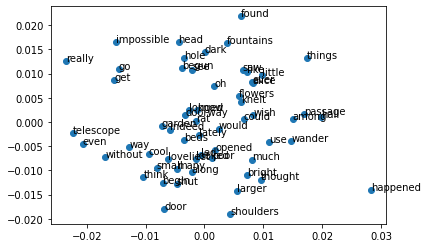

In [18]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
X = model1[model1.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model1.wv.vocab)
for i, word in enumerate(words):
   pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()